## 3.5 News classification

In [1]:
# code list Download the reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# code list 3-13 Index decode to News text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in
                           train_data[0]])


557056/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

### 3.5.2 Ready data

In [11]:
# code list 3-14 Encode data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
ont_hot_test_labels = to_one_hot(test_labels)

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3.5.3 Build network

In [17]:
# code list 3-15 Define model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [18]:
# code list 3-16 Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# code list 3-17 Assigned validation dataset
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
# code list 3-18 Training model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs =20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.6476 - accuracy: 0.4995 - val_loss: 1.7543 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.4338 - accuracy: 0.7045 - val_loss: 1.3116 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.0683 - accuracy: 0.7694 - val_loss: 1.1570 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8439 - accuracy: 0.8187 - val_loss: 1.0592 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6743 - accuracy: 0.8594 - val_loss: 0.9732 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.5400 - accuracy: 0.8881 - val_loss: 0.9262 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.4308 - accuracy: 0.9099 - val_loss: 0.8940 - val_accuracy: 0.8240
Epoch 8/20
16

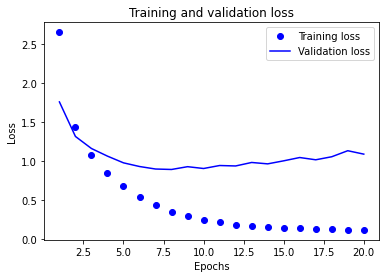

In [32]:
# code list 3-19 Draw training loss and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

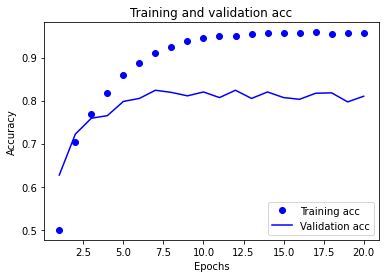

In [56]:
# code list 3-20 Draw training accuracy and validation accuracy
plt.clf() 
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
# code list 3-21 Training a new model from first start
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [36]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 45ms/step - loss: 2.6917 - accuracy: 0.5080 - val_loss: 1.7648 - val_accuracy: 0.6310
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.4261 - accuracy: 0.7093 - val_loss: 1.2871 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 0s 23ms/step - loss: 1.0380 - accuracy: 0.7846 - val_loss: 1.1254 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8111 - accuracy: 0.8321 - val_loss: 1.0309 - val_accuracy: 0.7940
Epoch 5/9
16/16 [==============================] - 0s 23ms/step - loss: 0.6484 - accuracy: 0.8658 - val_loss: 0.9777 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5163 - accuracy: 0.8913 - val_loss: 0.9307 - val_accuracy: 0.8040
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4122 - accuracy: 0.9153 - val_loss: 0.9203 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [37]:
results

[0.9745955467224121, 0.7876224517822266]

In [39]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17764915405164738

### 3.5.5 Generate predicted results in new data

In [40]:
# code lest 3-22 Generate predictions in new data
predictions = model.predict(x_test)

In [41]:
predictions[0].shape

(46,)

In [42]:
np.sum(predictions[0])

0.9999999

In [43]:
np.argmax(predictions[0])

4

### 3.5.6 Another method of process labels

In [44]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [45]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### 3.5.7 It's important for middle layer's dimension

In [52]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 1.8558 - accuracy: 0.6004 - val_loss: 1.2908 - val_accuracy: 0.7020
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0183 - accuracy: 0.7667 - val_loss: 1.0793 - val_accuracy: 0.7680
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 0.6870 - accuracy: 0.8431 - val_loss: 0.9812 - val_accuracy: 0.7940
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 0.4715 - accuracy: 0.8935 - val_loss: 0.9964 - val_accuracy: 0.8000
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 0.3420 - accuracy: 0.9265 - val_loss: 0.9906 - val_accuracy: 0.8030
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.2666 - accuracy: 0.9391 - val_loss: 1.0901 - val_accuracy: 0.7870
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.2143 - accuracy: 0.9468 - val_loss: 1.0892 - val_accuracy: 0.7930
Epoch 8/20
63/